In [33]:
!pip install qiskit==0.46.1
!pip install qiskit-algorithms==0.3.0
!pip install qiskit-optimization==0.6.0 
!pip install qiskit-ibm-runtime==0.21.1
!pip install qiskit-ibm-provider==0.10.0 


   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/4.2 MB 1.3 MB/s eta 0:00:04
   - -------------------------------------- 0.1/4.2 MB 1.1 MB/s eta 0:00:04
   - -------------------------------------- 0.2/4.2 MB 1.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.2/4.2 MB 1.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.3/4.2 MB 1.2 MB/s eta 0:00:04
   --- ------------------------------------ 0.4/4.2 MB 1.3 MB/s eta 0:00:03
   ---- ----------------------------------- 0.5/4.2 MB 1.5 MB/s eta 0:00:03
   ----- ---------------------------------- 0.6/4.2 MB 1.5 MB/s eta 0:00:03
   ------- -------------------------------- 0.7/4.2 MB 1.7 MB/s eta 0:00:03
   ------- -------------------------------- 0.7/4.2 MB 1.7 MB/s eta 0:00:03
   ------- -------------------------------- 0.7/4.2 MB 1.7 MB/s eta 0:00:03
   ------- -------------------------------- 0.8/4.2 MB 1.4 MB/s eta 0:00:03
   -------- -------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Britant\\anaconda3\\Lib\\site-packages\\qiskit\\_accelerate.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from qiskit_optimization.applications import Maxcut
from qiskit_algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit_algorithms.optimizers import SPSA
from qiskit.primitives import Sampler
from qiskit_optimization.algorithms import MinimumEigenOptimizer

Enter the number of nodes (n): 4


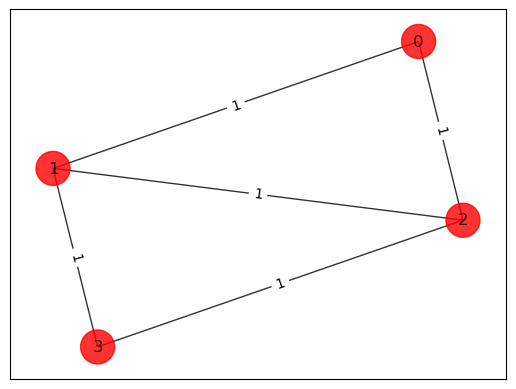

In [5]:
# Generating a graph of n nodes
n = int(input("Enter the number of nodes (n): "))
c=1#float(input("Enter the value of alpha:"))
v=1#float(input("Enter the value of J:"))
G = nx.Graph()
# Add nodes to the graph
G.add_nodes_from(np.arange(0, n-1,1))

    # Add edges with weights
for i in range(0, n-1 ):
    
    if i < n-1:
        G.add_edge(i, i+1, weight=v)
        if i < n - 2:
            G.add_edge(i, i +2, weight=c*v)

colors = ["r" for node in G.nodes()]
pos = nx.spring_layout(G)


def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=0.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    
# G.add_edge(0, 5, weight=v)
# G.add_edge(0, 4, weight=c*v)
# G.add_edge(1, 5, weight=c*v)
draw_graph(G, colors, pos)

In [6]:
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = temp["weight"]
print(w)

[[0. 1. 1. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 1.]
 [0. 1. 1. 0.]]


case = [0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0] cost = 2.0
case = [0, 1, 0, 0] cost = 3.0
case = [1, 1, 0, 0] cost = 3.0
case = [0, 0, 1, 0] cost = 3.0
case = [1, 0, 1, 0] cost = 3.0
case = [0, 1, 1, 0] cost = 4.0
case = [1, 1, 1, 0] cost = 2.0
case = [0, 0, 0, 1] cost = 2.0
case = [1, 0, 0, 1] cost = 4.0
case = [0, 1, 0, 1] cost = 3.0
case = [1, 1, 0, 1] cost = 3.0
case = [0, 0, 1, 1] cost = 3.0
case = [1, 0, 1, 1] cost = 3.0
case = [0, 1, 1, 1] cost = 2.0
case = [1, 1, 1, 1] cost = 0.0

Best solution = [0, 1, 1, 0] cost = 4.0


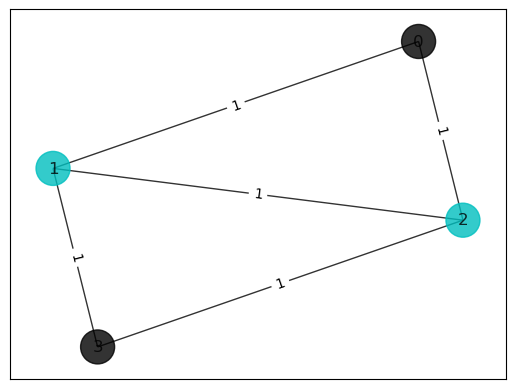

In [7]:
best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i, j] * x[i] * (1 - x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print("case = " + str(x) + " cost = " + str(cost))

colors = ["black" if xbest_brute[i] == 0 else "c" for i in range(n)]
#node_shape=["s" if xbest_brute[i] == 0 else "s" for i in range(n)]
draw_graph(G, colors, pos)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))

In [8]:
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()
print(qp.prettyprint())

Problem name: Max-cut

Maximize
  -2*x_0*x_1 - 2*x_0*x_2 - 2*x_1*x_2 - 2*x_1*x_3 - 2*x_2*x_3 + 2*x_0 + 3*x_1
  + 3*x_2 + 2*x_3

Subject to
  No constraints

  Binary variables (4)
    x_0 x_1 x_2 x_3



In [9]:
qubitOp,offset= qp.to_ising()
print("Offset:", offset)
print("Ising Hamiltonian:")
print(str(qubitOp))

Offset: -2.5
Ising Hamiltonian:
SparsePauliOp(['IIZZ', 'IZIZ', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])


In [10]:
a=-0.1#float(input("Enter the value of alpha:"))
j=1#float(input("Enter the value of J:"))
coe=[]
for i in range(2*n):
    if i%2==0:
        coe.append(j)
    else:
        coe.append(a*j)

In [11]:
qubitOp.paulis

PauliList(['IIZZ', 'IZIZ', 'IZZI', 'ZIZI', 'ZZII'])

In [12]:
from qiskit.quantum_info import SparsePauliOp 

In [13]:
#perodic boundary condition
length =n#int(input("Enter the length of the string: "))
# Z at the last and first position
string_1 = 'IZ' + 'I' * (length - 3)+'Z'
# Z at the last position position
string_2 = 'Z'+'I' * (length - 2) + 'Z'
# Z at both first and second last positions with I in between
string_3 = 'Z' + 'I' * (length - 3) + 'ZI'
print("String 1:", string_1)
print("String 2:", string_2)
print("String 3:", string_3)
H_periodic=SparsePauliOp.from_list([(string_1,j),(string_2,a*j),(string_3,a*j)])
H_1=SparsePauliOp(qubitOp.paulis)+H_periodic

String 1: IZIZ
String 2: ZIIZ
String 3: ZIZI


In [14]:
H_z=SparsePauliOp(H_1,coeffs=coe)

In [15]:
H_z.paulis

PauliList(['IIZZ', 'IZIZ', 'IZZI', 'ZIZI', 'ZZII', 'IZIZ', 'ZIIZ',
           'ZIZI'])

## In this block paste the above generated list


In [16]:
hz=['IIZZ', 'IZIZ', 'IZZI', 'ZIZI', 'ZZII', 'IZIZ', 'ZIIZ',
           'ZIZI']

In [17]:
#total hamiltonian construction by replacing Z with X and Y
lst =hz
hx= [s.replace('Z', 'X') for s in lst]
hy= [s.replace('Z', 'Y') for s in lst]
H_x=SparsePauliOp(hx,coeffs=coe)
H_y=SparsePauliOp(hy,coeffs=coe)
H_total=H_z+H_x+H_y

In [18]:
#this is a special case in which periodic condition is not generalised so the hamiltonian is written explicitly 
H_z=SparsePauliOp.from_list([('IIZZ',j),('IZZI',j),('ZZII',j),('ZIIZ',j),('IZIZ',a*j),('ZIZI',a*j)])
H_x=SparsePauliOp.from_list([('IIXX',j),('IXXI',j),('XXII',j),('XIIX',j),('IXIX',a*j),('XIXI',a*j)])
H_y=SparsePauliOp.from_list([('IIYY',j),('IYYI',j),('YYII',j),('YIIY',j),('IYIY',a*j),('YIYI',a*j)])
H_total=H_x+H_y+H_z

In [19]:
from qiskit_algorithms import NumPyMinimumEigensolver

In [20]:
# ee = NumPyMinimumEigensolver()
# result = ee.compute_minimum_eigenvalue(H_total)
# print("energy per spin:", result.eigenvalue.real/(2*n))
# print("Total energy :", result.eigenvalue.real/2)

In [21]:
from qiskit_algorithms import NumPyEigensolver
exact_solver = NumPyEigensolver(k=8)
exact_result = exact_solver.compute_eigenvalues(H_total)
ref_values = exact_result.eigenvalues
print(f"total energy values: {ref_values/2}")
eig=ref_values/2

total energy values: [-4.1 -2.1 -2.1 -2.1  0.1  0.1  0.1  0.1]


In [22]:
from qiskit_algorithms.minimum_eigensolvers import VQE
from qiskit.quantum_info import SparsePauliOp 
from qiskit.primitives import Estimator

In [36]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")

In [47]:
session = Session(backend=backend)
#service = QiskitRuntimeService(channel="ibm_quantum")
service = QiskitRuntimeService()
backend = service.get_backend("ibmq_qasm_simulator")
estimator = Estimator(session=session, options={"shots": int(1)})
sampler = Sampler(session=session, options={"shots": int(1)})

In [23]:
from qiskit_algorithms.optimizers import NFT,COBYLA,SPSA,SLSQP 

In [45]:
estimator=Estimator()# use this line while using statevector simulator locally
#ansatz =PauliTwoDesign(n, reps=7, seed=2)  
#we will iterate over these different optimizers
from qiskit.circuit.library import EfficientSU2
optimizers = [SPSA(maxiter=8)]
converge_counts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
    counts = []
    values = []
    ansatz=EfficientSU2(n,entanglement='reverse_linear',reps=7)

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H_total)
    converge_counts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)

print("\rOptimization complete      ")

Optimization complete      


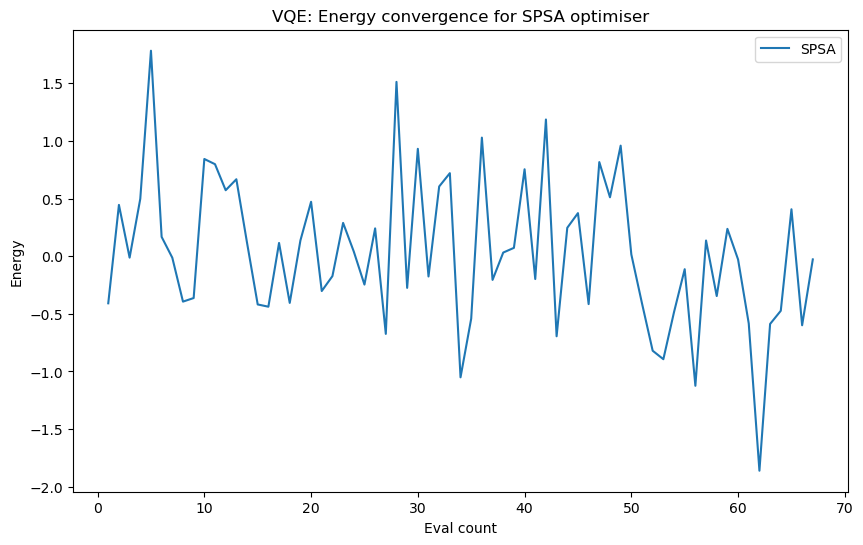

In [46]:
import pylab

pylab.rcParams["figure.figsize"] = (10, 6)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("VQE: Energy convergence for SPSA optimiser")
pylab.legend(loc="upper right");

In [47]:
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 16,
    'eigenvalue': -0.028059373231572485,
    'optimal_circuit': <qiskit.circuit.library.n_local.efficient_su2.EfficientSU2 object at 0x0000020B7D79B430>,
    'optimal_parameters': {   ParameterVectorElement(θ[32]): -2.0441999634781625,
                              ParameterVectorElement(θ[33]): -2.3037267641056594,
                              ParameterVectorElement(θ[34]): 3.3496206740799077,
                              ParameterVectorElement(θ[36]): -0.7838846322283567,
                              ParameterVectorElement(θ[35]): -5.101303899871426,
                              ParameterVectorElement(θ[37]): -2.035711522499044,
                              ParameterVectorElement(θ[38]): 0.018225907497115557,
                              ParameterVectorElement(θ[39]): 2.893547157060912,
                              ParameterVectorElement(θ[40]): -2.5954433704107953,
                              ParameterVecto

In [48]:
print("energy:", result.eigenvalue.real/2)
print("time:", result.optimizer_time)

energy: -0.014029686615786243
time: 0.7606949806213379


## QNSPSA

In [2]:
from qiskit.algorithms.optimizers import QNSPSA
from qiskit.quantum_info import state_fidelity
from qiskit.primitives import Estimator, Sampler

In [25]:
from qiskit.circuit.library import EfficientSU2
initial_pt=np.random.random(72)
obs=H_total
ansatz=EfficientSU2(n,entanglement='reverse_linear',reps=8)
def loss(x):
    result = estimator.run([ansatz], [obs], [x]).result()
    return np.real(result.values[0])
estimator=Estimator()
sampler=Sampler()
fidelity = QNSPSA.get_fidelity(ansatz,sampler)
qnspsa = QNSPSA(fidelity, maxiter=1)
optimizers = [qnspsa]
converge_counts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
    counts = []
    values = []
    
    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H_total)
    converge_counts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)

print("\rOptimization complete      ")
# the parameters, the function value, the number of function evaluations, the stepsize, whether the step was accepted

Optimization complete      


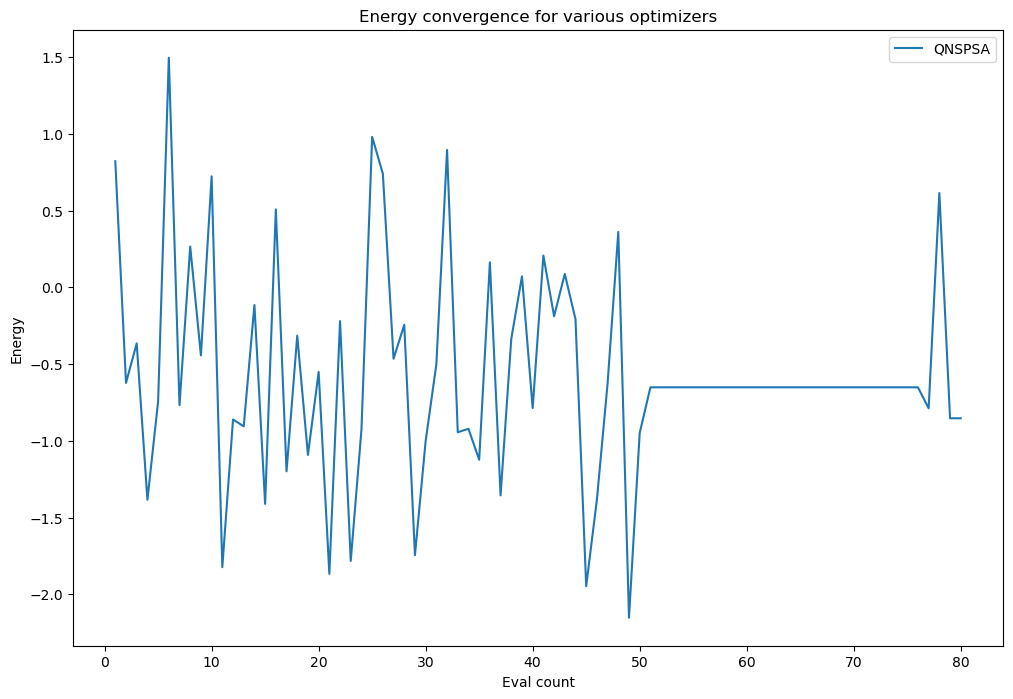

In [26]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");

In [32]:
result

(array([0.9924107 , 0.2046174 , 0.16642237, 0.29881158, 0.50292816,
        0.42948549, 0.18614944, 0.06582223, 0.07482897, 0.78257575,
        0.62092738, 0.67409757, 0.56472043, 0.54555418, 0.37214763,
        0.51021017, 0.30116542, 0.88358941, 0.27015217, 0.18089041,
        0.40551381, 0.02525744, 0.42656483, 0.96842972, 0.99019054,
        0.17049389, 0.25078237, 0.53210753, 0.43207696, 0.48095196,
        0.38088884, 0.06968613, 0.20644584, 0.88219831, 0.70345821,
        0.46526143, 0.13422464, 0.31522945, 0.83804506, 0.42198264,
        0.7828445 , 0.37395256, 0.22083584, 0.78824874, 0.86689295,
        0.7916909 , 0.09482714, 0.66056237, 0.1531803 , 0.71220484,
        0.1442541 , 0.79482299, 0.60022822, 0.10375736, 0.11764951,
        0.16929473, 0.52439104, 0.00215965, 0.25076273, 0.87079445,
        0.15177412, 0.90497525, 0.60341195, 0.04049571, 0.82262578,
        0.57098304, 0.71248906, 0.8199117 , 0.16409354, 0.19452489,
        0.26281772, 0.98571597]),
 0.38899999999

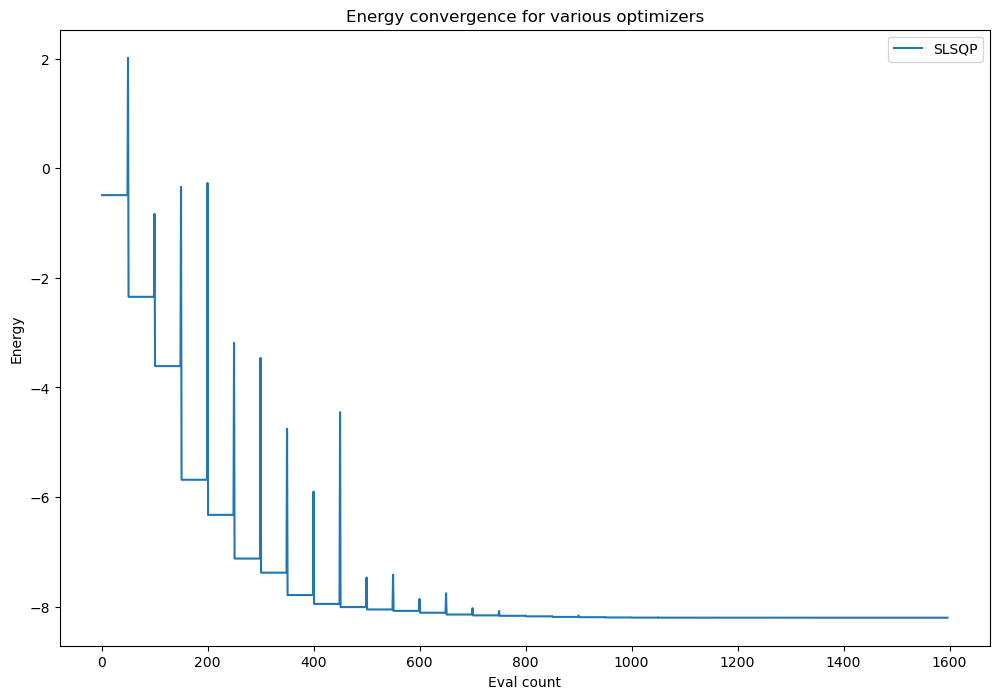

In [13]:
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");

In [15]:
print("energy:", result.eigenvalue.real/2)
print("time:", result.optimizer_time)

energy: -4.099999651350557
time: 59.46672439575195


## VQD

In [62]:
from qiskit_algorithms.state_fidelities import ComputeUncompute

estimator = Estimator()
sampler = Sampler()
fidelity = ComputeUncompute(sampler)
k = 1
#betas = [33, 33, 33]

In [63]:
counts = []
values = []
steps = []

def callback(eval_count, params, value, meta, step):
    counts.append(eval_count)
    values.append(value)
    steps.append(step)

In [64]:
from qiskit_algorithms import VQD
optimizer = SLSQP(maxiter=1000)
ansatz=EfficientSU2(n,entanglement='reverse_linear',reps=5)
vqd = VQD(estimator, fidelity, ansatz, optimizer, k=k, callback=callback)
result = vqd.compute_eigenvalues(operator = H_total)
vqd_values = result.eigenvalues

In [65]:
print(vqd_values.real)

[-8.19999921]


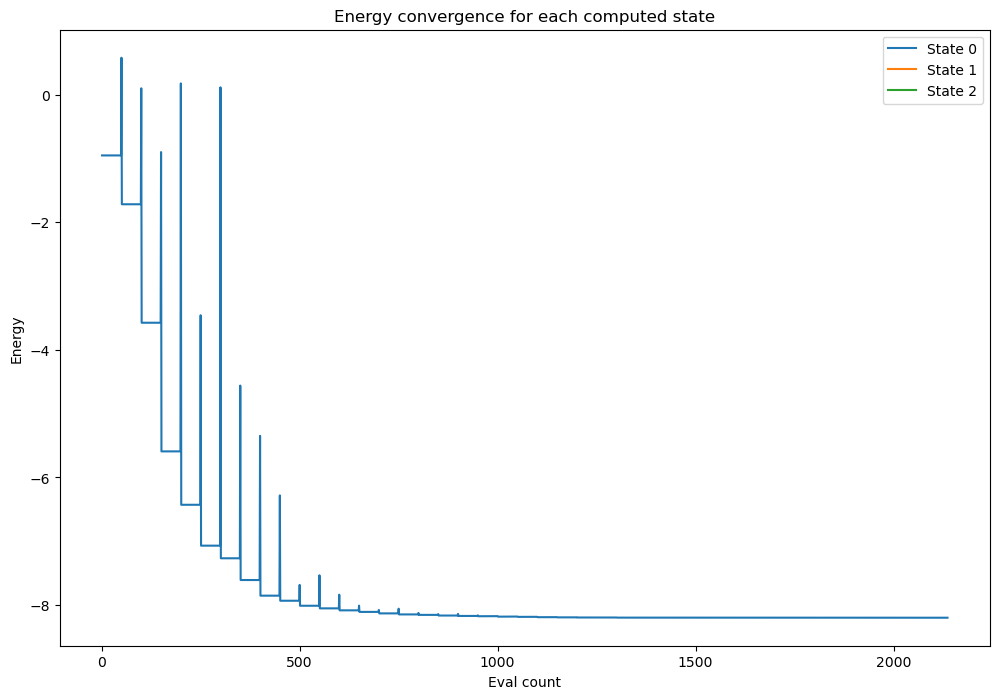

In [66]:
import numpy as np
import pylab

pylab.rcParams["figure.figsize"] = (12, 8)

steps = np.asarray(steps)
counts = np.asarray(counts)
values = np.asarray(values)

for i in range(1,4):
    _counts = counts[np.where(steps == i)]
    _values = values[np.where(steps == i)]
    pylab.plot(_counts, _values, label=f"State {i-1}")

pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for each computed state")
pylab.legend(loc="upper right");

In [67]:
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': array([2136]),
    'eigenvalues': array([-8.19999921+0.j]),
    'optimal_circuits': [   <qiskit.circuit.library.n_local.efficient_su2.EfficientSU2 object at 0x0000020B7E27E320>],
    'optimal_parameters': [   {   ParameterVectorElement(θ[1]): -2.234383711288152,
                                  ParameterVectorElement(θ[0]): -1.7023673869382228,
                                  ParameterVectorElement(θ[2]): 0.13928071901016048,
                                  ParameterVectorElement(θ[3]): 2.924844937482592,
                                  ParameterVectorElement(θ[4]): 2.628437488056504,
                                  ParameterVectorElement(θ[5]): -1.9322857901048895,
                                  ParameterVectorElement(θ[6]): 0.054582322038795095,
                                  ParameterVectorElement(θ[7]): -2.7217785257415748,
                                  ParameterVectorElement(θ[9]): -3.12851677545747

## QAOA

In [70]:
estimator=Estimator()
from qiskit.circuit.library import QAOAAnsatz
optimizers = [SLSQP(maxiter=100)]
converge_counts = np.empty([len(optimizers)], dtype=object)
converge_vals = np.empty([len(optimizers)], dtype=object)

for i, optimizer in enumerate(optimizers):
    print("\rOptimizer: {}        ".format(type(optimizer).__name__), end="")
    counts = []
    values = []
    ansatz=QAOAAnsatz(H_total,reps=5)

    def store_intermediate_result(eval_count, parameters, mean, std):
        counts.append(eval_count)
        values.append(mean)
     
    vqe = VQE(estimator, ansatz, optimizer, callback=store_intermediate_result)
    result = vqe.compute_minimum_eigenvalue(operator=H_total)
    converge_counts[i] = np.asarray(counts)
    converge_vals[i] = np.asarray(values)

print("\rOptimization complete      ")

Optimization complete      


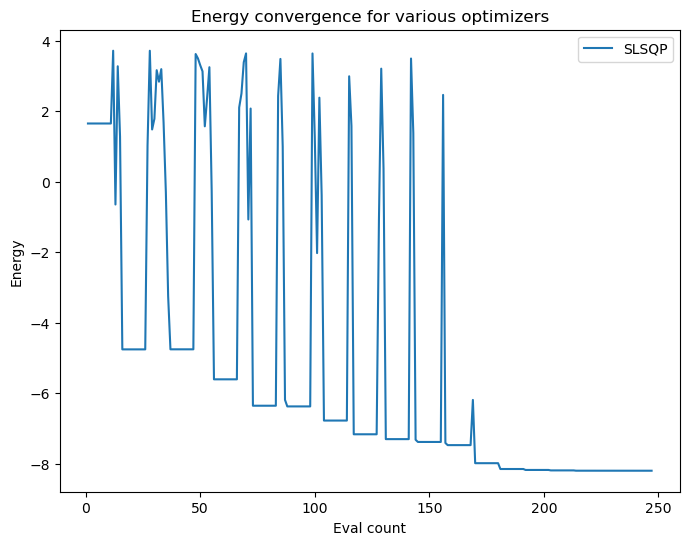

In [71]:
import pylab

pylab.rcParams["figure.figsize"] = (8, 6)
for i, optimizer in enumerate(optimizers):
    pylab.plot(converge_counts[i], converge_vals[i], label=type(optimizer).__name__)
pylab.xlabel("Eval count")
pylab.ylabel("Energy")
pylab.title("Energy convergence for various optimizers")
pylab.legend(loc="upper right");

In [72]:
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 247,
    'eigenvalue': -8.199999995345859,
    'optimal_circuit': <qiskit.circuit.library.n_local.qaoa_ansatz.QAOAAnsatz object at 0x0000020B7C740E50>,
    'optimal_parameters': {   ParameterVectorElement(β[4]): 6.1975048552460965,
                              ParameterVectorElement(γ[0]): -5.016065514992683,
                              ParameterVectorElement(γ[3]): -0.18940703430904723,
                              ParameterVectorElement(γ[4]): -1.0418625782934199,
                              ParameterVectorElement(γ[1]): -2.7806156785574743,
                              ParameterVectorElement(β[2]): 3.106993028670713,
                              ParameterVectorElement(β[3]): 5.336413242645437,
                              ParameterVectorElement(β[0]): 4.1568332927024985,
                              ParameterVectorElement(γ[2]): -6.373850594918593,
                              ParameterVectorElement(β[1]): 5.